In [9]:
from neural_net import *
import pandas as pd
import numpy as np
import math

In [10]:
A_1 = np.matrix([[5], [-5], [5], [-5]])
A_2 = np.matrix([[10, 10, 0, 0], [0, 0, 10, 10]])
A_3 = np.matrix([10, 10])
A = [A_1, A_2, A_3]

b_1 = np.matrix([[-0.75], [1.75], [-3.25], [4.25]])
b_2 = np.matrix([[-12.5], [-12.5]])
b_3 = np.matrix([-2.5])
b = [b_1, b_2, b_3]

sigmoid = np.vectorize(lambda x: 1 / (1 + math.e ** -x))
sigmoid_prime = np.vectorize(lambda x: (
    math.e ** -x) / (1 + math.e ** -x) ** 2)

activation_functions_and_derivatives = [[sigmoid, sigmoid_prime] for _ in range(3)]

datapoints = [[np.matrix(0), 0], [np.matrix(0.25), 1], [np.matrix(0.5), 0.5], [
    np.matrix(0.75), 1], [np.matrix(1), 0]]
learning_rate = 0.01

In [13]:
neural_net = NeuralNet(A, b, activation_functions_and_derivatives, datapoints, learning_rate)
neural_net.train(1000)

training completed!


<Axes: xlabel='0', ylabel='1'>

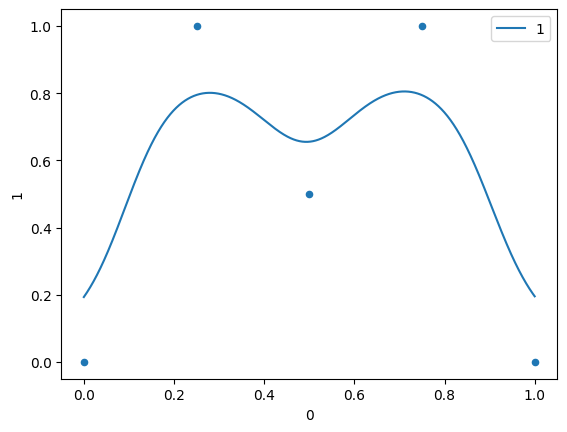

In [14]:
datapoint_df = pd.DataFrame(datapoints)
datapoint_plot = datapoint_df.plot(kind='scatter', x=0, y=1)
nn_df = pd.DataFrame([[x / 10000, float(neural_net.predict(np.matrix(x / 10000)))]
                     for x in range(10000)])
nn_df.plot(kind="line", x=0, y=1, ax=datapoint_plot)